In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
with open('data_description.txt', 'r') as descr:
    contents = descr.read()
    print(contents)
    descr.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [111]:
descr.close()

In [175]:
train_dataset = pd.read_csv('train.csv')
# making test dataset
test_dataset = pd.read_csv('test.csv') 

train_dataset.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [118]:
# train_dataset.columns

In [6]:
train_dataset.Id.isnull().sum()

0

In [119]:
# train_dataset.dtypes

In [120]:
high_nan_col_list = []
def calc_percent_missing(df):
    nan_percent = {col : df[col].isnull().mean() for col in df.columns}
    for (key, value) in nan_percent.items():
       # Check if key is even then add pair to new dictionary
       if value >= 0.5:
            high_nan_col_list.append(key)
    return nan_percent,high_nan_col_list

In [121]:
calc_percent_missing(train_dataset)
# .keys(
#     np.where(calc_percent_missing(test_dataset)).items()>=0.1)

({'Id': 0.0,
  'MSSubClass': 0.0,
  'MSZoning': 0.0,
  'LotFrontage': 0.1773972602739726,
  'LotArea': 0.0,
  'Street': 0.0,
  'Alley': 0.9376712328767123,
  'LotShape': 0.0,
  'LandContour': 0.0,
  'Utilities': 0.0,
  'LotConfig': 0.0,
  'LandSlope': 0.0,
  'Neighborhood': 0.0,
  'Condition1': 0.0,
  'Condition2': 0.0,
  'BldgType': 0.0,
  'HouseStyle': 0.0,
  'OverallQual': 0.0,
  'OverallCond': 0.0,
  'YearBuilt': 0.0,
  'YearRemodAdd': 0.0,
  'RoofStyle': 0.0,
  'RoofMatl': 0.0,
  'Exterior1st': 0.0,
  'Exterior2nd': 0.0,
  'MasVnrType': 0.005479452054794521,
  'MasVnrArea': 0.005479452054794521,
  'ExterQual': 0.0,
  'ExterCond': 0.0,
  'Foundation': 0.0,
  'BsmtQual': 0.025342465753424658,
  'BsmtCond': 0.025342465753424658,
  'BsmtExposure': 0.026027397260273973,
  'BsmtFinType1': 0.025342465753424658,
  'BsmtFinSF1': 0.0,
  'BsmtFinType2': 0.026027397260273973,
  'BsmtFinSF2': 0.0,
  'BsmtUnfSF': 0.0,
  'TotalBsmtSF': 0.0,
  'Heating': 0.0,
  'HeatingQC': 0.0,
  'CentralAir': 0

In [122]:
high_nan_col_list

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [123]:
null_cols_train = train_dataset.columns[train_dataset.isna().any()].tolist()
null_cols_test = test_dataset.columns[test_dataset.isna().any()].tolist()

print('cols with null in train = {}, '.format(len(null_cols_train)), 
      'cols with null in test= {}'.format(len(null_cols_test)))

cols with null in train = 19,  cols with null in test= 33


In [176]:
# droping high null columns
train_dataset.drop(high_nan_col_list, axis = 1, inplace= True)
test_dataset.drop(high_nan_col_list, axis = 1, inplace= True)

# replacing with zeros
repl_zeros_cols = ['LotFrontage', 'MasVnrArea']
train_dataset[repl_zeros_cols] = train_dataset[repl_zeros_cols].fillna(0)
test_dataset[repl_zeros_cols] = test_dataset[repl_zeros_cols].fillna(0)

# replacing with absence 
repl_None_cols = ['MasVnrType', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',
                  'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond']

# repl_None_cols = ['Alley', 'MasVnrType', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1',
#                   'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
#                  'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']



train_dataset[repl_None_cols] = train_dataset[repl_None_cols].fillna('None')
test_dataset[repl_None_cols] = test_dataset[repl_None_cols].fillna('None')

# additional nan values in test for objects
add_None_test_cols = ['GarageCars', ]

test_dataset[add_None_test_cols] = test_dataset[add_None_test_cols].fillna('None')
# additional replacing with zeros in test
add_zeros_cols = ['GarageArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageYrBlt'
                 ,'BsmtFullBath', 'BsmtHalfBath']

test_dataset[add_zeros_cols] = test_dataset[add_zeros_cols].fillna(0)
# BsmtExposure


In [177]:
y_test = pd.read_csv('sample_submission.csv')

test_dataset = test_dataset.merge(y_test, how='inner')


# droping rows with low amount of NA
low_q_na_obj = ['MSZoning', 'Utilities', 'Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType' ]

# test_dataset.dropna(subset = null_cols_test, inplace = True)

In [83]:
train_dataset.shape

(1460, 77)

In [81]:
test_dataset.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,167081.220949
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,164788.778231
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,219222.423400
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,184924.279659
1458,2919,60,RL,74.0,9627,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,11,2006,WD,Normal,187741.866657


In [178]:
# Train test split
y_test = test_dataset['SalePrice']
y_train = train_dataset['SalePrice']

X_train = train_dataset.drop('SalePrice', axis = 1)
X_test = test_dataset.drop('SalePrice', axis = 1)

In [34]:
# cat_cols = train_dataset.iloc[np.where(train_dataset.dtypes == np.float)].columns#.drop('Id', axis = 1)

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

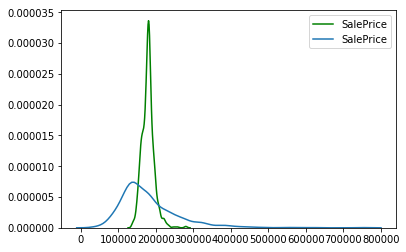

<Figure size 2880x2880 with 0 Axes>

In [87]:
# checking destribution of target
sns.kdeplot(y_test, color='green')
sns.kdeplot(y_train)
plt.figure(figsize=(40, 40))
plt.show()

In [66]:
# train_dataset[null_cols_train].info()

In [109]:
# test_dataset[null_cols_test].info()

In [110]:
# test_dataset[test_dataset.Exterior1st.isna()].isna().T#[['GarageCars']]
# ['MasVnrArea']

In [111]:
# train_dataset.Exterior1st.unique()

In [112]:
# test_dataset.Exterior1st.unique()

In [88]:
def psi_check(train,test, target):
    psi_col_list = list()
    for col in (train_dataset.columns):
#         if train_dataset[col].dtype != object and col != target:
        if train_dataset[col].dtype == float and col != target:
    #         maximums
            max_test = max(test_dataset[col])
            max_train = max(train_dataset[col])

            min_test = min(test_dataset[col])
            min_train = min(train_dataset[col])

            if max_test * 1.05 > max_train:
                psi_col_list.append(col)
                print('Max_test is bigger', str(col), max_test/max_train)
            elif min_test * 0.95 < min_train:
                psi_col_list.append(col)
                print('Min_test is smaller', str(col), min_test/min_train)
    return psi_col_list

In [89]:
psi_check(train_dataset,test_dataset, 'SalePrice')

Max_test is bigger GarageYrBlt 1.0980099502487561


['GarageYrBlt']

# Exercising CatBoost

In [44]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [179]:
from catboost import CatBoostRegressor
from sklearn.linear_model import ElasticNet, ElasticNetCV, MultiTaskElasticNetCV, LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

In [180]:
ind_obj = np.where(train_dataset.dtypes == np.object)[0]
cat_cols = train_dataset.iloc[:, ind_obj].columns

In [181]:
# cat_cols = X_train.iloc[np.where(X_train.dtypes != np.object)[0]].drop('Id', axis = 1)
X_train[cat_cols] = X_train[cat_cols].astype(str)
X_test[cat_cols] = X_test[cat_cols].astype(str)

X_train.drop('Id', axis = 1, inplace = True)
X_test.drop('Id', axis = 1, inplace = True)

In [182]:
# ll = cat_cols.columns.tolist()
cat_model = CatBoostRegressor(n_estimators = 500, cat_features = cat_cols.tolist()
#                               cat_cols
                             )

In [183]:
cat_model.fit(X_train, np.log(y_train))

Learning rate set to 0.076363
0:	learn: 0.3806183	total: 50.3ms	remaining: 25.1s
1:	learn: 0.3622441	total: 106ms	remaining: 26.5s
2:	learn: 0.3446280	total: 166ms	remaining: 27.6s
3:	learn: 0.3293697	total: 238ms	remaining: 29.6s
4:	learn: 0.3150095	total: 300ms	remaining: 29.7s
5:	learn: 0.3012896	total: 359ms	remaining: 29.6s
6:	learn: 0.2884221	total: 414ms	remaining: 29.2s
7:	learn: 0.2766225	total: 475ms	remaining: 29.2s
8:	learn: 0.2668321	total: 551ms	remaining: 30.1s
9:	learn: 0.2573411	total: 610ms	remaining: 29.9s
10:	learn: 0.2484124	total: 669ms	remaining: 29.7s
11:	learn: 0.2395753	total: 737ms	remaining: 30s
12:	learn: 0.2320482	total: 799ms	remaining: 29.9s
13:	learn: 0.2248088	total: 870ms	remaining: 30.2s
14:	learn: 0.2176220	total: 933ms	remaining: 30.2s
15:	learn: 0.2110271	total: 1.01s	remaining: 30.6s
16:	learn: 0.2053235	total: 1.08s	remaining: 30.8s
17:	learn: 0.1994076	total: 1.15s	remaining: 30.7s
18:	learn: 0.1939901	total: 1.21s	remaining: 30.6s
19:	learn: 0

162:	learn: 0.0918101	total: 10.7s	remaining: 22.1s
163:	learn: 0.0917039	total: 10.8s	remaining: 22.1s
164:	learn: 0.0914524	total: 10.8s	remaining: 22s
165:	learn: 0.0913308	total: 10.9s	remaining: 21.9s
166:	learn: 0.0913176	total: 11s	remaining: 21.9s
167:	learn: 0.0910906	total: 11s	remaining: 21.8s
168:	learn: 0.0908666	total: 11.1s	remaining: 21.7s
169:	learn: 0.0908487	total: 11.2s	remaining: 21.6s
170:	learn: 0.0905467	total: 11.2s	remaining: 21.6s
171:	learn: 0.0903326	total: 11.3s	remaining: 21.5s
172:	learn: 0.0901772	total: 11.4s	remaining: 21.5s
173:	learn: 0.0899417	total: 11.4s	remaining: 21.4s
174:	learn: 0.0896864	total: 11.5s	remaining: 21.3s
175:	learn: 0.0894276	total: 11.5s	remaining: 21.2s
176:	learn: 0.0891542	total: 11.6s	remaining: 21.2s
177:	learn: 0.0890253	total: 11.7s	remaining: 21.1s
178:	learn: 0.0888528	total: 11.7s	remaining: 21s
179:	learn: 0.0887248	total: 11.8s	remaining: 21s
180:	learn: 0.0887007	total: 11.9s	remaining: 20.9s
181:	learn: 0.0886381	

323:	learn: 0.0742285	total: 21.1s	remaining: 11.5s
324:	learn: 0.0742147	total: 21.1s	remaining: 11.4s
325:	learn: 0.0741275	total: 21.2s	remaining: 11.3s
326:	learn: 0.0739791	total: 21.3s	remaining: 11.3s
327:	learn: 0.0738144	total: 21.3s	remaining: 11.2s
328:	learn: 0.0737933	total: 21.4s	remaining: 11.1s
329:	learn: 0.0736739	total: 21.5s	remaining: 11.1s
330:	learn: 0.0735979	total: 21.5s	remaining: 11s
331:	learn: 0.0733988	total: 21.6s	remaining: 10.9s
332:	learn: 0.0733782	total: 21.7s	remaining: 10.9s
333:	learn: 0.0733588	total: 21.7s	remaining: 10.8s
334:	learn: 0.0731926	total: 21.8s	remaining: 10.7s
335:	learn: 0.0729939	total: 21.9s	remaining: 10.7s
336:	learn: 0.0729263	total: 21.9s	remaining: 10.6s
337:	learn: 0.0727214	total: 22s	remaining: 10.5s
338:	learn: 0.0726512	total: 22s	remaining: 10.5s
339:	learn: 0.0725679	total: 22.1s	remaining: 10.4s
340:	learn: 0.0725631	total: 22.2s	remaining: 10.3s
341:	learn: 0.0723486	total: 22.2s	remaining: 10.3s
342:	learn: 0.0722

482:	learn: 0.0602376	total: 31.5s	remaining: 1.11s
483:	learn: 0.0600989	total: 31.5s	remaining: 1.04s
484:	learn: 0.0600181	total: 31.6s	remaining: 978ms
485:	learn: 0.0600067	total: 31.7s	remaining: 913ms
486:	learn: 0.0599863	total: 31.7s	remaining: 847ms
487:	learn: 0.0599520	total: 31.8s	remaining: 782ms
488:	learn: 0.0599464	total: 31.9s	remaining: 717ms
489:	learn: 0.0599220	total: 31.9s	remaining: 652ms
490:	learn: 0.0598493	total: 32s	remaining: 586ms
491:	learn: 0.0597336	total: 32.1s	remaining: 521ms
492:	learn: 0.0596960	total: 32.1s	remaining: 456ms
493:	learn: 0.0595185	total: 32.2s	remaining: 391ms
494:	learn: 0.0594613	total: 32.2s	remaining: 326ms
495:	learn: 0.0593907	total: 32.3s	remaining: 261ms
496:	learn: 0.0593064	total: 32.4s	remaining: 195ms
497:	learn: 0.0592416	total: 32.4s	remaining: 130ms
498:	learn: 0.0591662	total: 32.5s	remaining: 65.1ms
499:	learn: 0.0591308	total: 32.6s	remaining: 0us


In [184]:
from sklearn.metrics import mean_squared_error

In [186]:
y_test
train_pred = cat_model.predict(X_train)
train_r2 = r2_score(train_pred, np.log(y_train))
print('r2 train =' , round(train_r2, 2))

test_pred = cat_model.predict(X_test)
test_r2 = r2_score(test_pred, np.log(y_test))
print('r2 test =' , round(test_r2, 2))
print('mse =' , round(mean_squared_error(np.log(y_test), test_pred)))

r2 train = 0.97
r2 test = 0.05
mse = 0.0


In [100]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [134]:
import xgboost as xgb
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sklearn.metrics

In [161]:
xgb_model = xgb.XGBRegressor(eval_metric='rmse')

In [162]:
param_grid = [
    {'subsample': [0.5], 'n_estimators': [1400], 
     'max_depth': [5], 'learning_rate': [0.02],
     'colsample_bytree': [0.4], 'colsample_bylevel': [0.5],
     'reg_alpha':[1], 'reg_lambda': [1], 'min_child_weight':[2]}
]
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, verbose=1, scoring= 'neg_mean_squared_error'
#                            'neg_root_mean_squared_error'
                          )

In [163]:
X_train[cat_cols] = X_train[cat_cols].astype(str)
X_test[cat_cols] = X_test[cat_cols].astype(str)

dummy_train = pd.get_dummies(X_train[cat_cols])
dummy_test = pd.get_dummies(X_test[cat_cols])

X_train = X_train.drop(cat_cols, axis = 1)
X_train = X_train.join(dummy_train)#.dropna()

X_test = X_test.drop(cat_cols, axis = 1)
X_test = X_test.join(dummy_test)#.dropna()

KeyError: "None of [Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',\n       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',\n       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',\n       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',\n       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',\n       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',\n       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',\n       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],\n      dtype='object')] are in the [columns]"

In [171]:
grid_search.fit(X_train, np.log(y_train))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   25.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
       colsample_bylevel=None, colsample_bynode=None,
       colsample_bytree=None, early_stopping_rounds=None,
       enable_categorical=False, eval_metric='rmse', gamma=None,
       gpu_id=None, grow_policy=None, importance_type..._pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'subsample': [0.5], 'n_estimators': [1400], 'max_depth': [5], 'learning_rate': [0.02], 'colsample_bytree': [0.4], 'colsample_bylevel': [0.5], 'reg_alpha': [1], 'reg_lambda': [1], 'min_child_weight': [2]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [172]:
cv_results = pd.DataFrame(grid_search.cv_results_)
display(cv_results.sort_values('rank_test_score')[:6].T)

E:\Programms\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Programms\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Programms\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Programms\anaconda3\lib\site-packages\sklearn\utils\deprec

,0
mean_fit_time,8.38158
std_fit_time,0.157524
mean_score_time,0.0468736
std_score_time,2.23939e-06
param_colsample_bylevel,0.5
param_colsample_bytree,0.4
param_learning_rate,0.02
param_max_depth,5
param_min_child_weight,2
param_n_estimators,1400


In [167]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_colsample_bylevel', 'param_colsample_bytree',
       'param_learning_rate', 'param_max_depth', 'param_min_child_weight',
       'param_n_estimators', 'param_reg_alpha', 'param_reg_lambda',
       'param_subsample', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [173]:
max(cv_results.mean_test_score)

-0.015590185516406285

In [114]:
from sklearn.metrics import mean_squared_error
# y_test.SalePrice

In [97]:
test_r2 = r2_score(test_pred, y_test)
print('r2 test =' , round(test_r2, 2))
print('mse =' , round(mean_squared_error(y_test, test_pred)))

r2 test = 0.08
mse = 5456165045.0


# New split

In [53]:
test_dataset.shape

(1450, 81)

In [84]:
train_dataset.shape

(1460, 81)

In [155]:
test_dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [86]:
all_data = pd.concat([train_dataset,test_dataset], ignore_index = True)

In [87]:
all_data.shape

(2910, 81)

In [92]:
all_data.iloc[2,:]

Id                     3
MSSubClass            60
MSZoning              RL
LotFrontage           68
LotArea            11250
Street              Pave
Alley               None
LotShape             IR1
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood     CollgCr
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        2Story
OverallQual            7
OverallCond            5
YearBuilt           2001
YearRemodAdd        2002
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType       BrkFace
MasVnrArea           162
ExterQual             Gd
ExterCond             TA
Foundation         PConc
                  ...   
BedroomAbvGr           3
KitchenAbvGr           1
KitchenQual           Gd
TotRmsAbvGrd           6
Functional           Typ
Fireplaces             1
FireplaceQu           TA
GarageType        Attchd
GarageYrBlt         2001


In [125]:
from sklearn.model_selection import train_test_split, ShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(all_data.drop(['SalePrice', 'Id'], axis = 1), all_data.SalePrice,
                                                   shuffle= True)

In [126]:
y_test.tail()

1104    106000.00000
240     262500.00000
141     260000.00000
180     177000.00000
1549    181922.15256
Name: SalePrice, dtype: float64

In [134]:
X_train, X_test, y_train, y_test = train_test_split(train_dataset.drop(['SalePrice', 'Id'], axis = 1)
                                                    , train_dataset.SalePrice)

In [135]:
ind_obj = np.where(train_dataset.dtypes == np.object)[0]
cat_cols = train_dataset.iloc[:, ind_obj].columns.tolist()

In [137]:


# X_train.drop('Id', axis = 1, inplace = True)
# X_test.drop('Id', axis = 1, inplace = True)

cat_model = CatBoostRegressor(n_estimators = 300, cat_features = cat_cols)


In [138]:
cat_model.fit(X_train, y_train)

Learning rate set to 0.110537
0:	learn: 72478.1988893	total: 73.2ms	remaining: 21.9s
1:	learn: 67838.4172274	total: 146ms	remaining: 21.7s
2:	learn: 64001.1123856	total: 185ms	remaining: 18.4s
3:	learn: 60327.0295077	total: 263ms	remaining: 19.5s
4:	learn: 56676.8947374	total: 330ms	remaining: 19.5s
5:	learn: 53411.0098148	total: 395ms	remaining: 19.3s
6:	learn: 50054.4116922	total: 454ms	remaining: 19s
7:	learn: 47699.5466968	total: 523ms	remaining: 19.1s
8:	learn: 45553.5417803	total: 575ms	remaining: 18.6s
9:	learn: 43624.0256366	total: 638ms	remaining: 18.5s
10:	learn: 41601.5580853	total: 708ms	remaining: 18.6s
11:	learn: 40063.7971587	total: 775ms	remaining: 18.6s
12:	learn: 38511.7926743	total: 847ms	remaining: 18.7s
13:	learn: 36957.9094684	total: 909ms	remaining: 18.6s
14:	learn: 35759.5332855	total: 975ms	remaining: 18.5s
15:	learn: 34679.7955779	total: 1.02s	remaining: 18.1s
16:	learn: 33546.6753079	total: 1.07s	remaining: 17.9s
17:	learn: 32597.7925257	total: 1.15s	remainin

151:	learn: 12160.4100943	total: 10.2s	remaining: 9.97s
152:	learn: 12116.9564106	total: 10.3s	remaining: 9.9s
153:	learn: 12083.0176967	total: 10.4s	remaining: 9.83s
154:	learn: 12064.2589614	total: 10.4s	remaining: 9.77s
155:	learn: 12033.3744416	total: 10.5s	remaining: 9.7s
156:	learn: 12018.9964191	total: 10.6s	remaining: 9.63s
157:	learn: 12016.8199296	total: 10.6s	remaining: 9.56s
158:	learn: 11994.0515503	total: 10.7s	remaining: 9.49s
159:	learn: 11951.7482825	total: 10.8s	remaining: 9.42s
160:	learn: 11912.8116226	total: 10.8s	remaining: 9.35s
161:	learn: 11887.8479632	total: 10.9s	remaining: 9.28s
162:	learn: 11846.9492426	total: 11s	remaining: 9.22s
163:	learn: 11786.7690980	total: 11s	remaining: 9.15s
164:	learn: 11783.3845459	total: 11.1s	remaining: 9.08s
165:	learn: 11764.4645148	total: 11.2s	remaining: 9.02s
166:	learn: 11663.6168884	total: 11.2s	remaining: 8.94s
167:	learn: 11638.3837544	total: 11.3s	remaining: 8.88s
168:	learn: 11593.8426190	total: 11.4s	remaining: 8.81

In [139]:
train_pred = cat_model.predict(X_train)
train_r2 = r2_score(train_pred, y_train)
print('r2 train =' , round(train_r2, 2))

test_pred = cat_model.predict(X_test)
test_r2 = r2_score(test_pred, y_test)
print('r2 test =' , round(test_r2, 2))
print('mse =' , round(mean_squared_error(y_test, test_pred)))

r2 train = 0.98
r2 test = 0.81
mse = 1136913995.0


In [140]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.pipeline import Pipeline, make_pipeline

In [143]:
all_data[cat_cols].shape

(2910, 43)

In [147]:
all_data.shape

(2910, 81)

In [159]:
# all_data[cat_cols]

In [177]:
all_data = pd.concat([train_dataset,test_dataset], ignore_index = True)
dummy_data = pd.get_dummies(all_data[cat_cols])
dummy_data.shape

(2910, 267)

In [178]:
all_data = all_data.drop(cat_cols, axis = 1)
all_data = all_data.join(dummy_data).dropna()

X_train, X_test, y_train, y_test = train_test_split(all_data.drop(['SalePrice', 'Id'], axis = 1), all_data.SalePrice,
#                                                    shuffle= True
                                                   )

In [179]:
all_data.shape

(2829, 305)

In [180]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.pipeline import Pipeline
cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=0)

boston_elnet=make_pipeline(MinMaxScaler(),
#                           PolynomialFeatures(degree=2, include_bias=False), 
                          ElasticNet(alpha=0.001, max_iter=100000) 
                         )
boston_elnet=boston_elnet.fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(boston_elnet.score(X_train, y_train))) 
print("R-квадрат на тестовом наборе: {:.2f}".format(boston_elnet.score(X_test, y_test))) 
print("Количество использованных признаков: {}".format(np.sum(boston_elnet.named_steps['elasticnet'].coef_ != 0)))

ValueError: could not convert string to float: 'None'

In [174]:
X_train.isna

<bound method DataFrame.isna of       MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
909           60        149.0    12589            6            5       2005   
1543          30         50.0     5000            4            7       1925   
1454          20         62.0     7500            7            5       2004   
1554          20        100.0    15263            5            5       1959   
2881          30         50.0     7030            4            6       1925   
522           50         50.0     5000            6            7       1947   
294           20         80.0     9600            6            5       1953   
295           80         37.0     7937            6            6       1984   
2506          20          0.0    14217            5            5       1994   
158           60        100.0    12552            7            5       2004   
350          120         68.0     7820            9            5       2007   
271           20    